* https://github.com/yoonkt200/python-data-analysis - 이것이 데이터 분석이다. 

# 1. 전세계 음주 데이터 분석
* Step1. 탐색 - 데이터의 기초 정보 살펴보기 
    * 데이터셋의 기본 정보 <br/><br/>
    
* Step2. 인사이트의 발견 - 탐색과 시각화
    * 피처간의 상관관계 탐색
        * 피처간의 상관계수 구하기
        * 여러 피처의 상관관계 분석
    * 가장 많이 주문한 item
    * 주문된 item의 개수
    * item당 주문 계수와 총량 <br/><br/>
    
* Step 3. 탐색적 분석 - 스무고개로 분석하는 개념적 탐색
    * 결측 데이터 전처리
    * 그룹 단위의 데이터 분석 : 대륙별 분석
    * 그룹 단위의 데이터 분석 : 의미를 가지고 피처 재구성하기 <br/><br/>

* Step 4. 통계적 분석 - 분석 대상간의 통계적 차이 검정하기
    * 아프리카와 유럽간의 술 소비량 차이 검정하기 <br/><br/>
    
* 대한민국은 얼마나 술을 독하게 마시는 나라일까?    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drinks=pd.read_csv("..\SampleData\Book\drinks.csv")

## 1-1. 탐색 
* 데이터셋(drinks)의 기본 정보

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [5]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 1-2. 인사이트의 발견 - 탐색과 시각화
#### 가. Feature 상관관계 탐색
    * 두 피처간의 상관계수를 구한다. 
    * 여러 피처의 상관게수 분석
    * Pearson은 상관계수를 구하는 계산 방법 중 하나로 가장 널리 쓰이는 방법이다.

In [6]:
drinks[['beer_servings', 'wine_servings']].corr(method='pearson')    # 맥주와 와인의 상관계수 1에 가까우면 관련있음

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [13]:
corr=drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].corr(method='pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [10]:
import seaborn as sns

#### 나. 히트맵 시각화

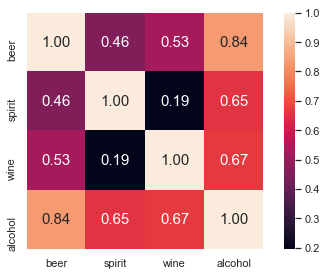

In [25]:
cols_view=['beer', 'spirit', 'wine', 'alcohol']
sns.set(font_scale=1.0)
sns.heatmap(corr.values, 
            cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2f', 
            annot_kws={'size':15}, 
            yticklabels=cols_view, 
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

#### 다. Feature Scatter Plot

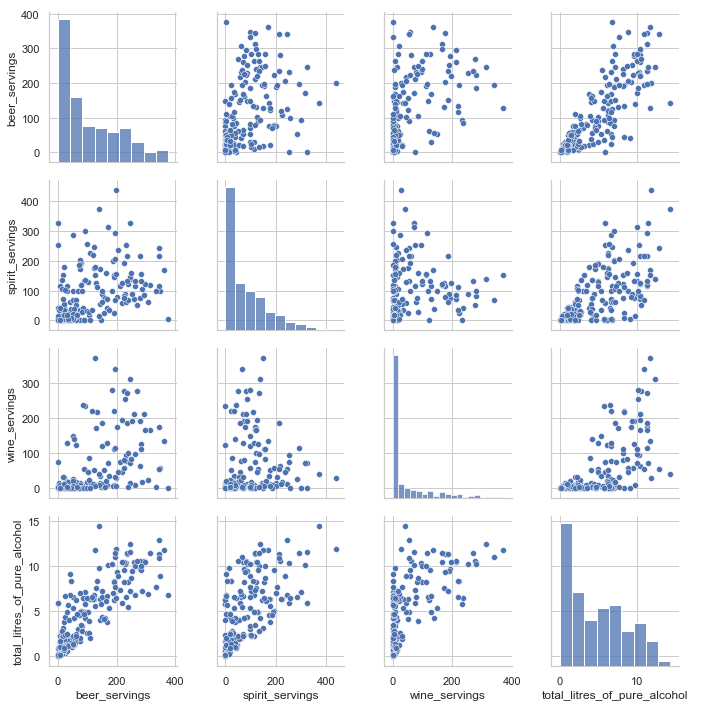

In [26]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()